<a href="https://colab.research.google.com/github/sreya-majumder/Customer-Churn-Prediction/blob/main/CSE422_Project_CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the dataset**



In [ ]:
initial_dataset = pd.read_csv('/content/drive/MyDrive/CSE/CSE422/churn.csv')


In [ ]:
#initial_dataset = pd.read_csv('/content/churn.csv')

**Data Visualization**

In [ ]:
initial_dataset.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [ ]:
initial_dataset.tail()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,36987,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,36988,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,36989,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0
36991,36991,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,Gift Vouchers/Coupons,...,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,0


In [ ]:
# printing the shape of the dataset
initial_dataset.shape


(36992, 24)

In [ ]:
initial_dataset.describe()

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,18495.500000,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,10678.814916,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,0.000000,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,9247.750000,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,18495.500000,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,27743.250000,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,36991.000000,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


In [ ]:
initial_dataset.columns

Index(['Unnamed: 0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [ ]:
initial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [ ]:
initial_dataset["churn_risk_score"].unique()

array([0, 1])

In [ ]:
initial_dataset['churn_risk_score'].value_counts()

churn_risk_score
1    20012
0    16980
Name: count, dtype: int64

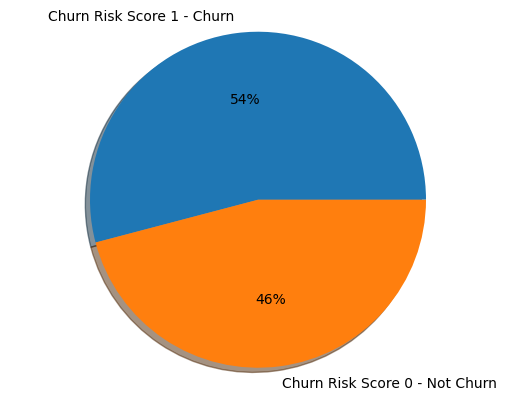

In [ ]:
# Pie chart

x,y = initial_dataset['churn_risk_score'].value_counts()
classs = [x, y]
class_labels = ["Churn Risk Score 1 - Churn", "Churn Risk Score 0 - Not Churn"]
plt.pie(classs, labels = class_labels, autopct = '%0.0f%%', shadow = True)
plt.axis("equal")
plt.show()


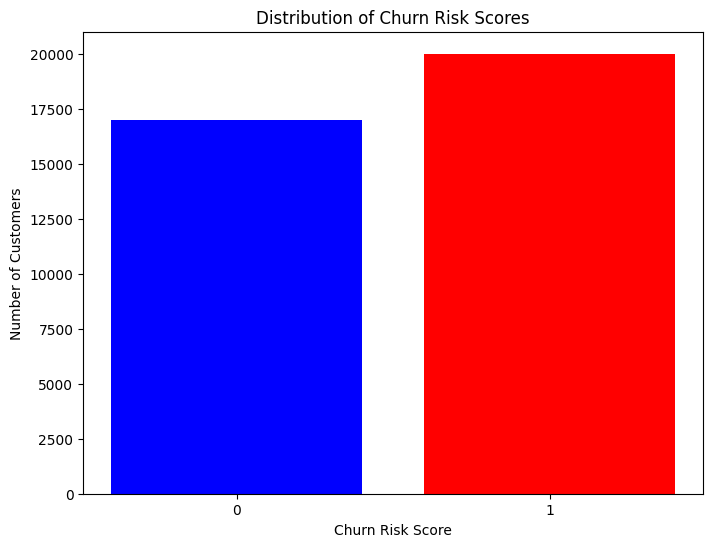

In [ ]:
# Bar Chart

churn_risk_scores = [0, 1]
counts = [len(initial_dataset[initial_dataset['churn_risk_score'] == score]) for score in churn_risk_scores]

plt.figure(figsize=(8, 6))
plt.bar(churn_risk_scores, counts, color=['blue', 'red'])
plt.xlabel('Churn Risk Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Risk Scores')
plt.xticks(churn_risk_scores)
plt.show()

**Data PreProcessing**

In [ ]:
# Dropping Unnamed Column
dataset = initial_dataset.drop(["Unnamed: 0","security_no"],axis=1)

In [ ]:
# Checking for duplicate rows
duplicate_rows = dataset[dataset.duplicated()]
print("Duplicate Rows:", duplicate_rows )

Duplicate Rows: Empty DataFrame
Columns: [age, gender, region_category, membership_category, joining_date, joined_through_referral, referral_id, preferred_offer_types, medium_of_operation, internet_option, last_visit_time, days_since_last_login, avg_time_spent, avg_transaction_value, avg_frequency_login_days, points_in_wallet, used_special_discount, offer_application_preference, past_complaint, complaint_status, feedback, churn_risk_score]
Index: []

[0 rows x 22 columns]


In [ ]:
#checking null values
dataset.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
#checking the percentage of null values in each column
for column in dataset.columns:
    null_count = dataset[column].isnull().sum()
    if null_count > 0:
        total_rows = len(dataset)
        null_percentage = (null_count / total_rows) * 100
        print(f"Percentage of null values in the column '{column}': {round(null_percentage, 2)}%")

Percentage of null values in the column 'region_category': 14.67%
Percentage of null values in the column 'preferred_offer_types': 0.78%
Percentage of null values in the column 'points_in_wallet': 9.31%


**Handling Null Values**

In [ ]:
#Dropping Rows

dataset.dropna(subset=['preferred_offer_types'], inplace=True)

In [ ]:
#Impute using mode/most frequent value

most_frequent_value = dataset['region_category'].mode()[0]
dataset['region_category'].fillna(most_frequent_value, inplace=True)


In [ ]:
#Impute using mean

from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
dataset['points_in_wallet'] = mean_imputer.fit_transform(dataset[['points_in_wallet']])

In [ ]:
#checking the null values

missing_values_after = dataset.isnull().sum()
print("Columns with missing values after imputation:\n", missing_values_after)

Columns with missing values after imputation:
 age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64


In [ ]:
#Converting Categorical Columns to Numerical Using Label Encoder

from sklearn.preprocessing import LabelEncoder

categorical_columns = dataset.select_dtypes(include=['object']).columns
print(categorical_columns)
for column in categorical_columns:
  dataset[column] = LabelEncoder().fit_transform(dataset[column])

print(dataset.shape)
print(dataset.info())

Index(['gender', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')
(36704, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 36704 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36704 non-null  int64  
 1   gender                        36704 non-null  int64  
 2   region_category               36704 non-null  int64  
 3   membership_category           36704 non-null  int64  
 4   joining_date                  36704 non-null  int64  
 5   joined_through_referral       36704 non-null  int64  
 6   referral_id

In [ ]:
data_corr = dataset.corr()
data_corr

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
age,1.000000,0.000409,0.006304,0.000296,-0.010174,-0.000547,0.001847,-0.006962,-0.008381,0.011291,...,0.002196,-0.000304,0.004513,0.000809,-0.006252,0.004172,0.001476,0.003495,-0.006906,0.006074
gender,0.000409,1.000000,0.002366,0.003601,0.001359,-0.001132,0.006136,0.000055,-0.002618,-0.003833,...,-0.009097,0.002968,0.005911,-0.008954,-0.000663,0.000407,-0.007672,0.001031,-0.002096,-0.005437
region_category,0.006304,0.002366,1.000000,0.012729,0.004796,-0.005939,0.007000,-0.008469,-0.002926,-0.000646,...,0.004287,0.016099,-0.000599,0.009444,0.000536,-0.004704,-0.001373,-0.000782,0.016096,-0.017514
membership_category,0.000296,0.003601,0.012729,1.000000,-0.002740,-0.007451,0.008190,-0.018766,0.005228,0.004584,...,0.006299,0.094235,-0.000294,0.163557,0.007027,0.004436,-0.010316,-0.006792,0.086793,-0.457383
joining_date,-0.010174,0.001359,0.004796,-0.002740,1.000000,0.003230,-0.000048,0.003447,-0.003217,-0.004550,...,0.005519,-0.000922,0.001939,0.001514,0.001091,-0.001309,-0.001368,0.001958,0.007160,0.010154
joined_through_referral,-0.000547,-0.001132,-0.005939,-0.007451,0.003230,1.000000,-0.241432,0.003356,-0.010795,-0.004378,...,0.092497,-0.016730,-0.006645,-0.008016,0.016495,0.005459,-0.001428,0.002191,-0.017194,0.016757
referral_id,0.001847,0.006136,0.007000,0.008190,-0.000048,-0.241432,1.000000,-0.003912,0.010780,0.000878,...,-0.083483,0.026020,0.006631,0.007340,-0.018982,-0.007670,-0.005738,-0.003089,0.021856,-0.020250
preferred_offer_types,-0.006962,0.000055,-0.008469,-0.018766,0.003447,0.003356,-0.003912,1.000000,-0.002136,0.002125,...,-0.005928,-0.023405,-0.002612,-0.006988,0.001084,0.000985,-0.006020,0.000518,-0.025805,0.025130
medium_of_operation,-0.008381,-0.002618,-0.002926,0.005228,-0.003217,-0.010795,0.010780,-0.002136,1.000000,-0.007449,...,-0.102947,-0.011504,-0.005885,0.001259,-0.025758,-0.026574,0.005300,0.000959,-0.002622,0.008348
internet_option,0.011291,-0.003833,-0.000646,0.004584,-0.004550,-0.004378,0.000878,0.002125,-0.007449,1.000000,...,-0.002249,-0.005476,-0.003429,0.003750,-0.000981,0.005097,-0.000740,-0.009542,0.001575,-0.007915


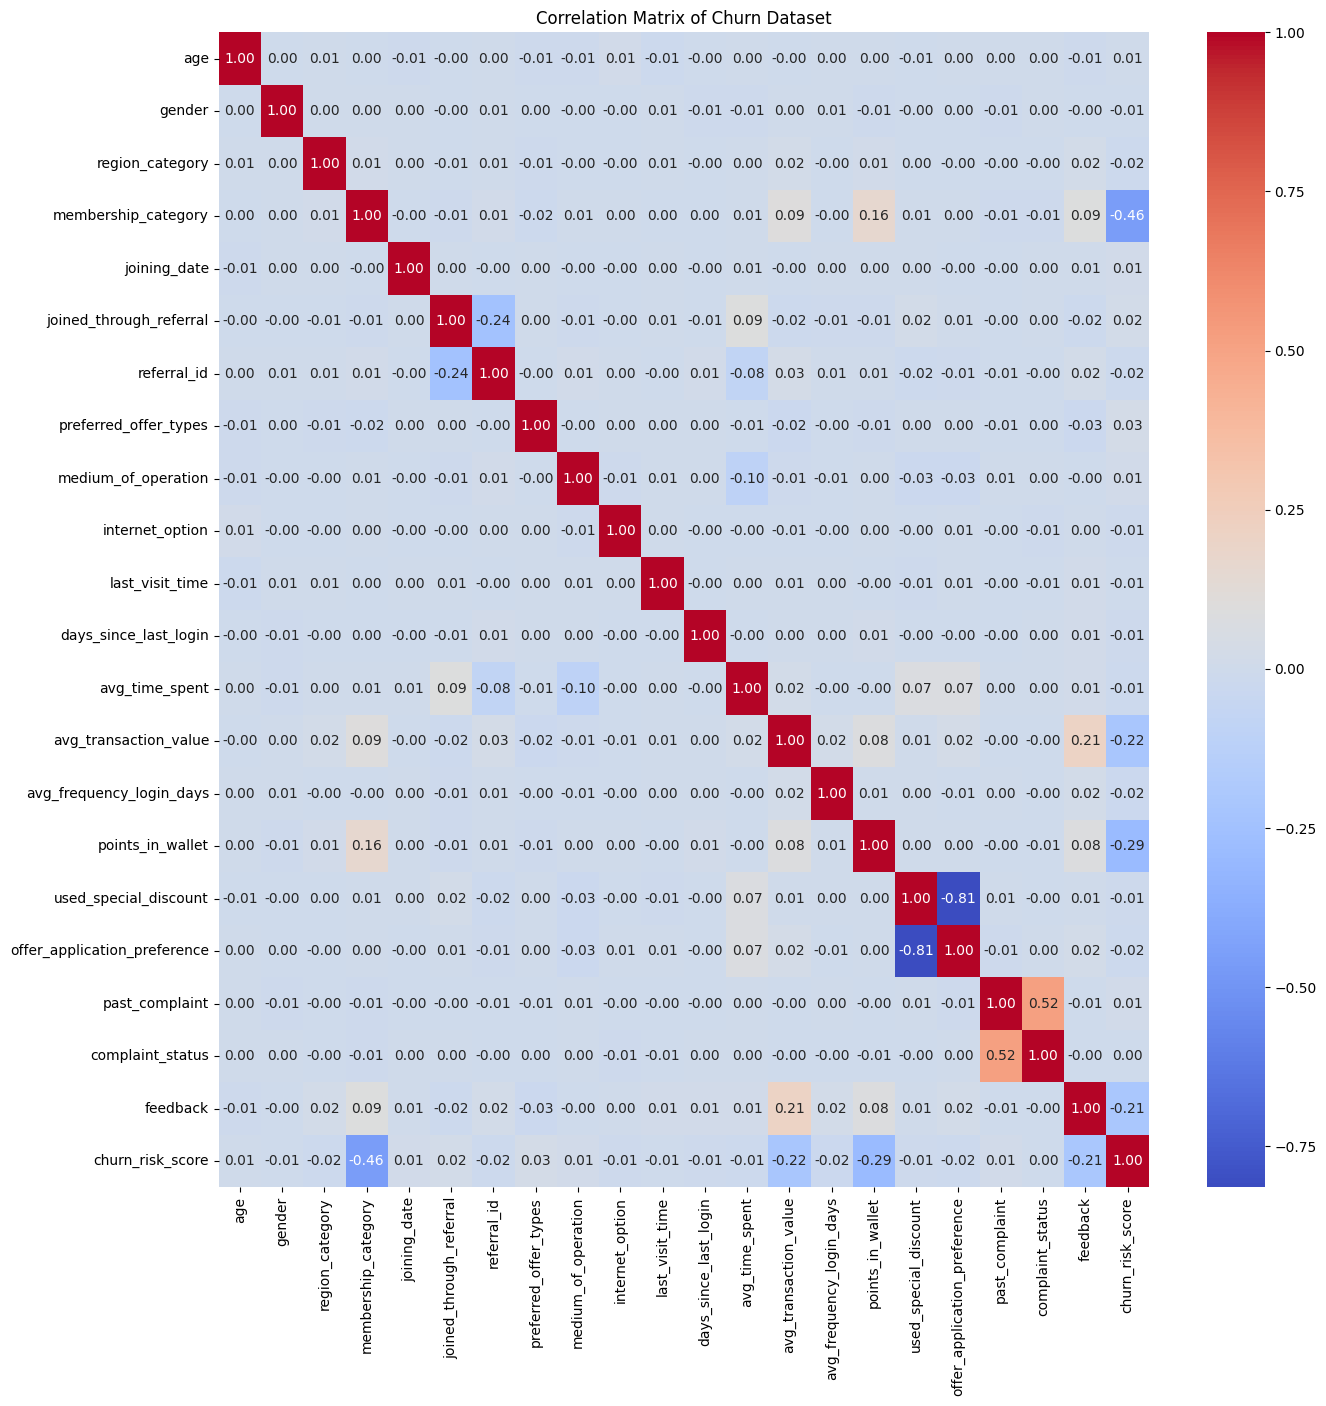

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Churn Dataset')
plt.show()

In [ ]:
dataset = dataset.drop(["offer_application_preference"],axis=1)

**Data Spliting**

In [ ]:
#Training and Testing

x = dataset.drop(['churn_risk_score'], axis=1)
y = dataset[['churn_risk_score']]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (36704, 20)
Shape of y: (36704, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (25692, 20)
Shape of x_test: (11012, 20)
Shape of y_train: (25692, 1)
Shape of y_test: (11012, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

print("Scaled feature variables (x_scaled):")
print(x_train_scaled[:5])

Scaled feature variables (x_scaled):
[[0.11111111 0.5        0.         0.8        0.4456621  0.5
  1.         0.         0.66666667 1.         0.6231574  0.9902439
  0.6487161  0.14456383 0.44846626 0.31430599 1.         1.
  0.5        0.875     ]
 [0.2962963  0.         1.         0.6        0.85844749 0.
  0.04371681 0.5        0.66666667 0.5        0.27532841 0.
  0.48494886 0.05172217 0.44355828 0.50673453 0.         1.
  0.         0.125     ]
 [0.03703704 0.5        0.         0.2        0.68493151 0.5
  1.         1.         0.66666667 0.         0.36069793 0.98341463
  0.47823116 0.11163192 0.50245399 0.59290601 1.         1.
  1.         0.125     ]
 [0.57407407 0.5        0.5        1.         0.83196347 1.
  0.21283186 1.         0.66666667 1.         0.89390647 0.99219512
  0.49930828 0.25825248 0.81472393 0.47531108 0.         0.
  0.25       0.875     ]
 [0.33333333 0.         0.5        0.6        0.71780822 1.
  0.43557522 0.5        0.66666667 0.5        0.34111041 0

Naive Bayes Accuracy: 75.74%
Naive Bayes Precision: 74.95%
Naive Bayes Recall: 82.45%
Naive Bayes F1 Score: 78.52%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      5091
           1       0.75      0.82      0.79      5921

    accuracy                           0.76     11012
   macro avg       0.76      0.75      0.75     11012
weighted avg       0.76      0.76      0.76     11012



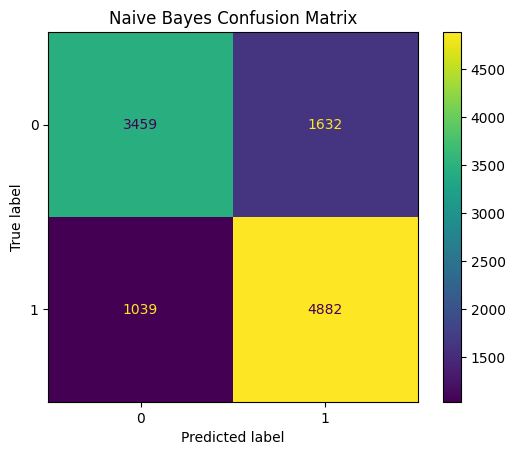

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

# Assuming x represents feature variables and y represents the target variable
x = dataset.drop(['churn_risk_score'], axis=1)
y = dataset['churn_risk_score']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform scaler on training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Instantiate Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(x_train_scaled, y_train)

# Make predictions using the Naive Bayes classifier
y_pred_nb = nb_classifier.predict(x_test_scaled)

# Calculate accuracy for Naive Bayes
accuracyNB = accuracy_score(y_test, y_pred_nb) * 100
print("Naive Bayes Accuracy: {:.2f}%".format(accuracyNB))

# Calculate precision for Naive Bayes
precisionNB = precision_score(y_test, y_pred_nb) * 100
print('Naive Bayes Precision: {:.2f}%'.format(precisionNB))

# Calculate recall for Naive Bayes
recallNB = recall_score(y_test, y_pred_nb) * 100
print('Naive Bayes Recall: {:.2f}%'.format(recallNB))

# Calculate F1 score for Naive Bayes
f1NB = f1_score(y_test, y_pred_nb) * 100
print('Naive Bayes F1 Score: {:.2f}%'.format(f1NB))

# Generate classification report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Create a confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (25692, 20)
Shape of x_test: (11012, 20)
Shape of y_train: (25692, 1)
Shape of y_test: (11012, 1)


**ML Model Implementation**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Accuracy: 0.7574464220849982
Naive Bayes Precision: 0.7584989676001535
Naive Bayes Recall: 0.7574464220849982
Naive Bayes F1 Score: 0.7557299048416215
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      5091
           1       0.75      0.82      0.79      5921

    accuracy                           0.76     11012
   macro avg       0.76      0.75      0.75     11012
weighted avg       0.76      0.76      0.76     11012



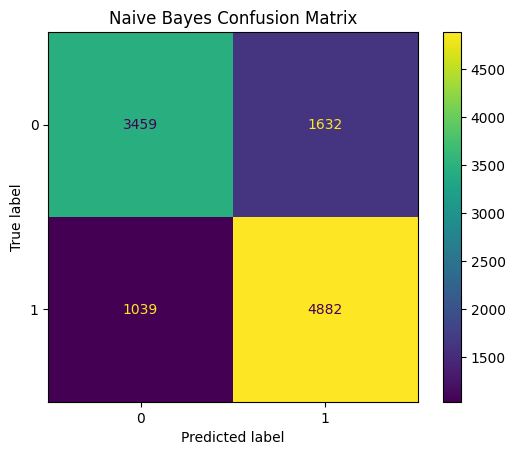

In [ ]:
#Applying Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Instantiate Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(x_train, y_train)

# Make predictions using the Naive Bayes classifier
y_pred_nb = nb_classifier.predict(x_test)

# Calculate accuracy for Naive Bayes
accuracyNB = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracyNB)

# Calculate precision for Naive Bayes
precisionNB = precision_score(y_test, y_pred_nb, average='weighted')
print('Naive Bayes Precision:', precisionNB)

# Calculate recall for Naive Bayes
recallNB = recall_score(y_test, y_pred_nb, average='weighted')
print('Naive Bayes Recall:', recallNB)

# Calculate F1 score for Naive Bayes
f1NB = f1_score(y_test, y_pred_nb, average='weighted')
print('Naive Bayes F1 Score:', f1NB)


# Generate classification report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Create a confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_classifier.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
disp_nb.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.7801489284416999
SVM Precision: 0.7800446548743302
SVM Recall: 0.7801489284416999
SVM F1 Score: 0.7795616786627501
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      5091
           1       0.78      0.82      0.80      5921

    accuracy                           0.78     11012
   macro avg       0.78      0.78      0.78     11012
weighted avg       0.78      0.78      0.78     11012



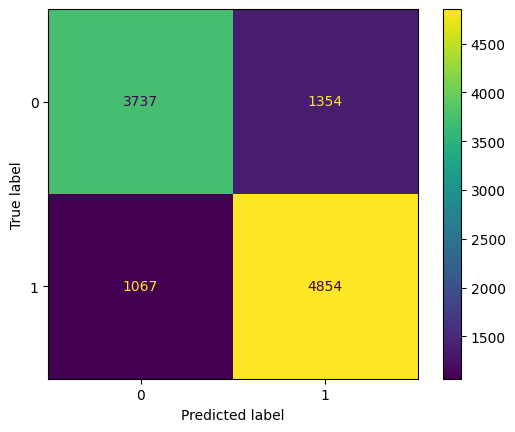

In [ ]:
#Applying Support Vector Machine

from sklearn import svm

# Create an SVM classifier
svm_classifier = svm.SVC()

# Fit the SVM classifier to the training data
svm_classifier.fit(x_train, y_train)

# Make predictions using the SVM classifier
y_pred_svm = svm_classifier.predict(x_test)

# Calculate accuracy
accuracySVM = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracySVM)

# Calculate precision
precisionSVM = precision_score(y_test, y_pred_svm, average='weighted')
print("SVM Precision:", precisionSVM)

# Calculate recall
recallSVM = recall_score(y_test, y_pred_svm, average='weighted')
print("SVM Recall:", recallSVM)

# Calculate F1 Score
f1SVM = f1_score(y_test, y_pred_svm, average='weighted')
print("SVM F1 Score:", f1SVM)


# Generate classification report
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:\n", report_svm)

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_classifier.classes_)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp_svm.plot()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.764620414093716
Logistic Regression Precision: 0.764778098661056
Logistic Regression Recall: 0.764620414093716
Logistic Regression F1 Score: 0.7636143742834611
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73      5091
           1       0.76      0.82      0.79      5921

    accuracy                           0.76     11012
   macro avg       0.76      0.76      0.76     11012
weighted avg       0.76      0.76      0.76     11012



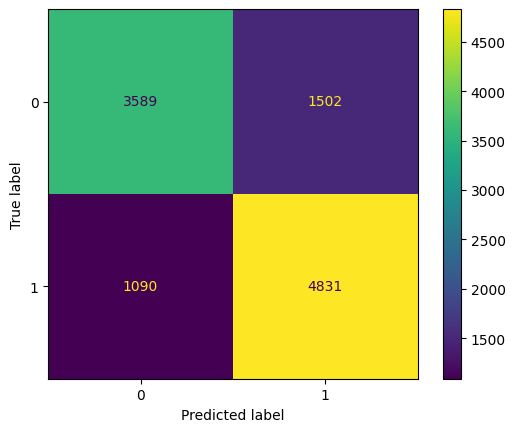

In [ ]:
#Applying Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(x_train, y_train)

# Make predictions using the Logistic Regression classifier
y_pred_logreg = logreg_classifier.predict(x_test)

# Calculate accuracy
accuracyLogReg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracyLogReg)

# Calculate precision
precisionLogReg = precision_score(y_test, y_pred_logreg, average='weighted')
print("Logistic Regression Precision:", precisionLogReg)

# Calculate recall
recallLogReg = recall_score(y_test, y_pred_logreg, average='weighted')
print("Logistic Regression Recall:", recallLogReg)

# Calculate F1 score
f1LogReg = f1_score(y_test, y_pred_logreg, average='weighted')
print("Logistic Regression F1 Score:", f1LogReg)

# Generate classification report
report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report for Logistic Regression:\n", report_logreg)

# Create a confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=logreg_classifier.classes_)

# Display confusion matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_classifier.classes_)
disp_logreg.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.6947875045405013
KNN Precision: 0.6941527076272294
KNN Recall: 0.6947875045405013
KNN F1 Score: 0.6934445828940516
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66      5091
           1       0.70      0.75      0.73      5921

    accuracy                           0.69     11012
   macro avg       0.69      0.69      0.69     11012
weighted avg       0.69      0.69      0.69     11012



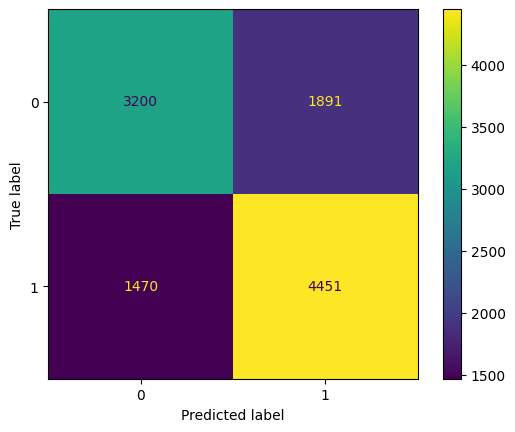

In [ ]:
# Applying K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Make predictions using the KNN classifier
y_pred_knn = knn_classifier.predict(x_test)

# Calculate accuracy
accuracyKNN = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracyKNN)

# Calculate precision
precisionKNN = precision_score(y_test, y_pred_knn, average='weighted')
print("KNN Precision:", precisionKNN)

# Calculate recall
recallKNN = recall_score(y_test, y_pred_knn, average='weighted')
print("KNN Recall:", recallKNN)

# Calculate F1 score
f1KNN = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN F1 Score:", f1KNN)

# Generate classification report
report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN:\n", report_knn)

# Create a confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_classifier.classes_)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_classifier.classes_)
disp_knn.plot()
plt.show()


Decision Tree Accuracy: 0.9027424627678896
Decision Tree Precision: 0.9030133303706971
Decision Tree Recall: 0.9027424627678896
Decision Tree F1 Score: 0.9028017754067268
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      5091
           1       0.92      0.90      0.91      5921

    accuracy                           0.90     11012
   macro avg       0.90      0.90      0.90     11012
weighted avg       0.90      0.90      0.90     11012



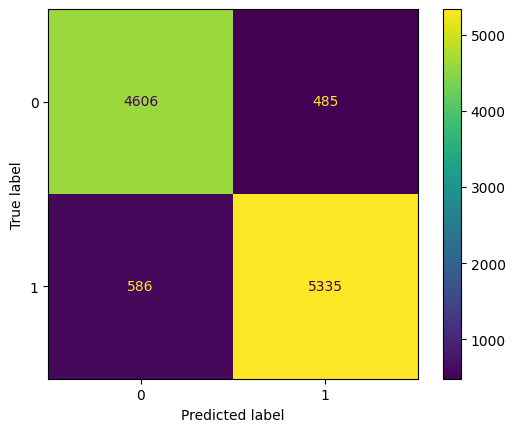

In [ ]:
# Applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# Make predictions using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(x_test)

# Calculate accuracy
accuracyDT = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracyDT)

# Calculate precision
precisionDT = precision_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Precision:", precisionDT)

# Calculate recall
recallDT = recall_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Recall:", recallDT)

# Calculate F1 score
f1DT = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree F1 Score:", f1DT)

# Generate classification report
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:\n", report_dt)

# Create a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_classifier.classes_)

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot()
plt.show()


<ipython-input-43-245636fb46a5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


Random Forest Accuracy: 0.9294406102433709
Random Forest Precision: 0.9297084713001895
Random Forest Recall: 0.9294406102433709
Random Forest F1 Score: 0.9293374151696665
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      5091
           1       0.92      0.95      0.94      5921

    accuracy                           0.93     11012
   macro avg       0.93      0.93      0.93     11012
weighted avg       0.93      0.93      0.93     11012



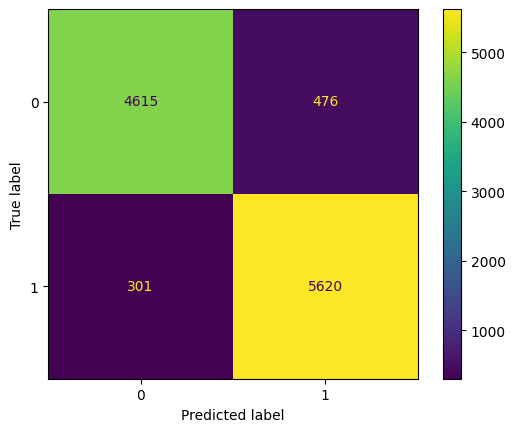

In [ ]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

# Make predictions using the Random Forest classifier
y_pred_rf = rf_classifier.predict(x_test)

# Calculate accuracy
accuracyRF = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracyRF)

# Calculate precision
precisionRF = precision_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Precision:", precisionRF)

# Calculate recall
recallRF = recall_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Recall:", recallRF)

# Calculate F1 score
f1RF = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest F1 Score:", f1RF)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", report_rf)

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()
plt.show()


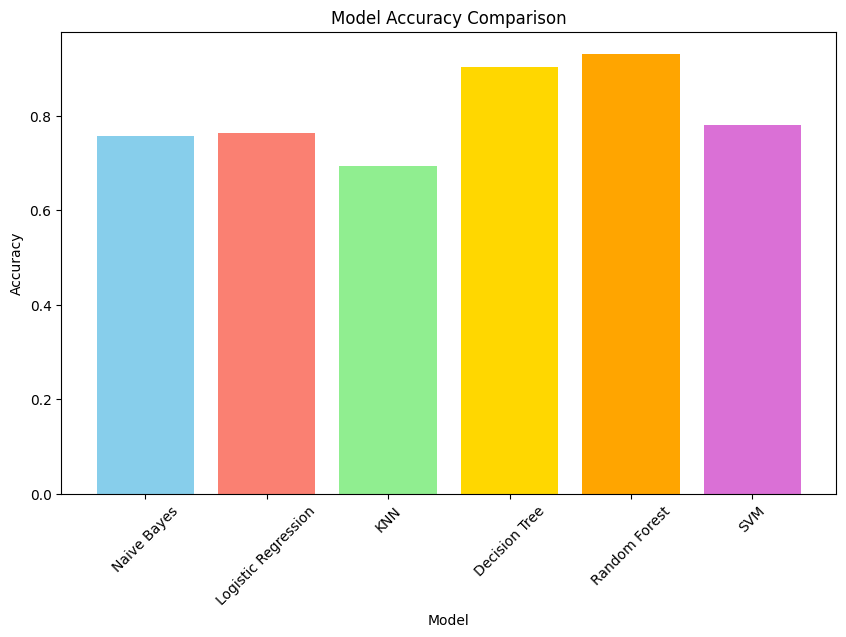

In [ ]:
#Plotting Accuracy

import matplotlib.pyplot as plt

# Define model names and accuracy scores
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [accuracyNB, accuracyLogReg, accuracyKNN, accuracyDT, accuracyRF, accuracySVM]

# Define colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orange', 'orchid']

# Plot bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


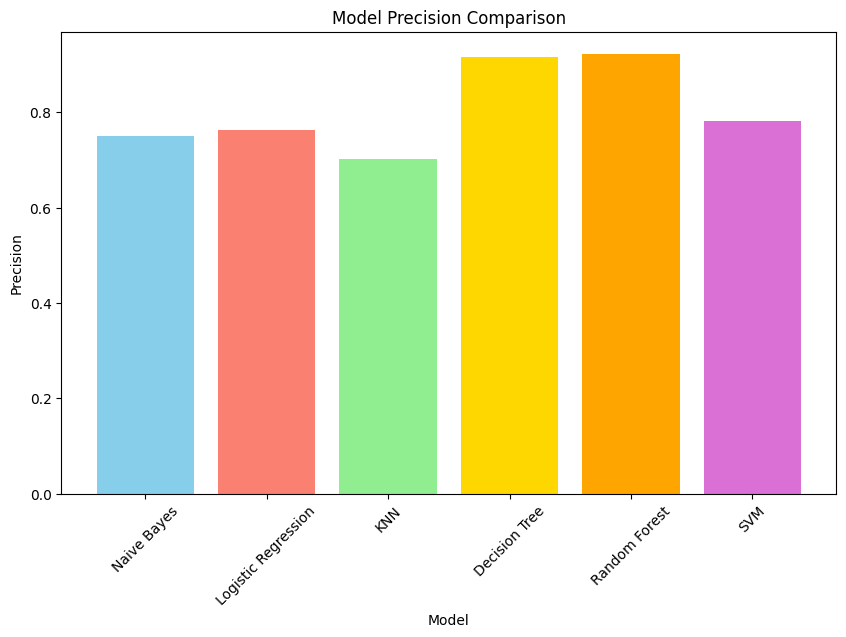

In [ ]:
#Plotting Precision

# Define model names and precision scores
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
precision_scores = [precisionNB, precisionLogReg, precisionKNN, precisionDT, precisionRF, precisionSVM]

# Define colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orange', 'orchid']

# Plot bar chart for precision
plt.figure(figsize=(10, 6))
plt.bar(model_names, precision_scores, color=colors)
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()


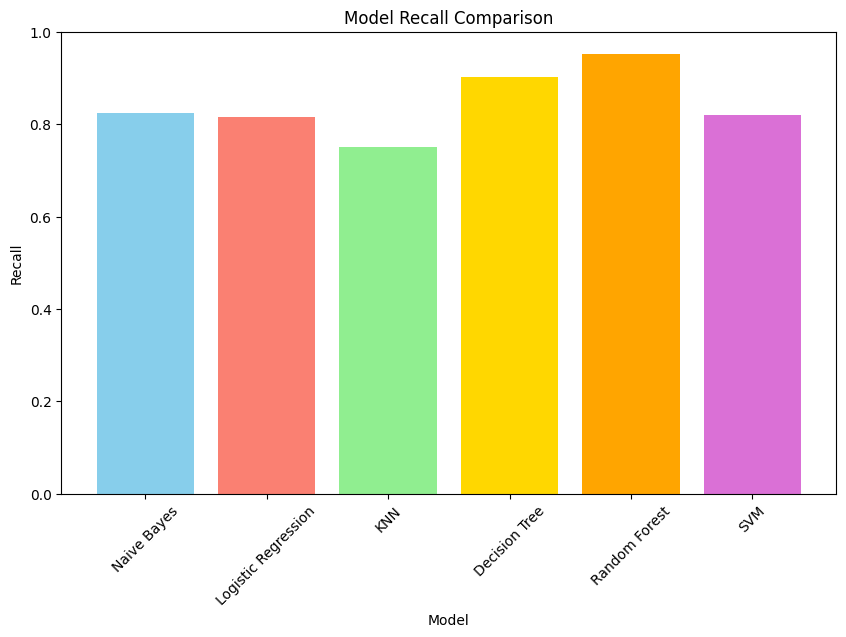

In [ ]:
#Plotting Recall

# Define model names and recall scores
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
recall_scores = [recallNB, recallLogReg, recallKNN, recallDT, recallRF, recallSVM]

# Define colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orange', 'orchid']

# Plot bar chart for recall
plt.figure(figsize=(10, 6))
plt.bar(model_names, recall_scores, color=colors)
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()


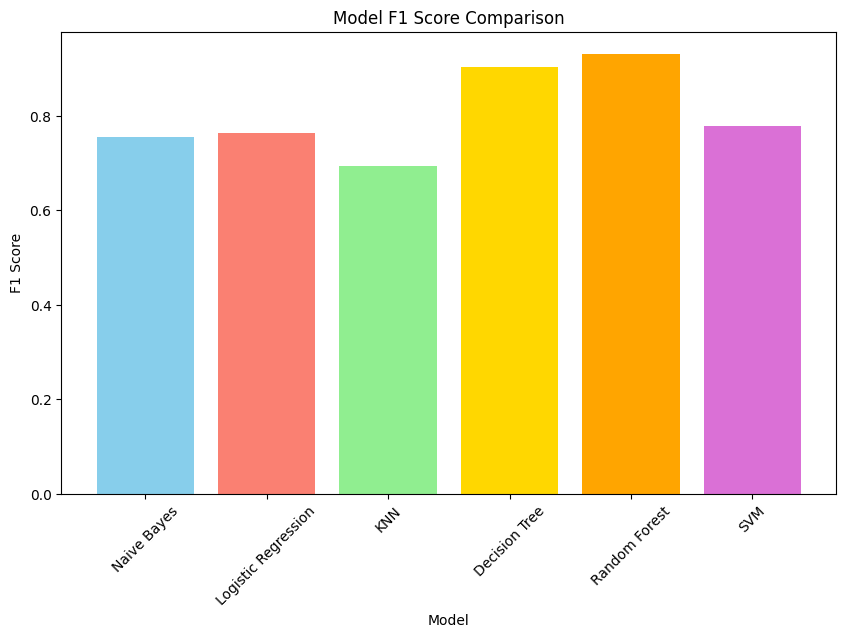

In [ ]:
#Plotting F1 score

# Define model names and F1 scores
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
f1_scores = [f1NB, f1LogReg, f1KNN, f1DT, f1RF, f1SVM]

# Define colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orange', 'orchid']

# Plot bar chart for F1 score
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=colors)
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()
